# Recherche (partie II): le modele SEIR

<div class="alert alert-block alert-info">
<li>Prénoms et noms: Ina Campan / Catalina Danila / Dorka Kiraly
<li>Groupe: ARE Viral G2
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.integrate import odeint
from scipy.optimize import fsolve
from numpy import linalg

<div class="alert alert-block alert-warning">
    Les equations du <b><code>modele SEIR avec parametres de naissance et de mortalite</code></b> sont:
     
$$S'(t) = -\beta S(t)I(t) + \nu N(t) - \mu S(t)\\
I'(t) = \beta S(t)I(t) - \alpha E(t) - \mu E(t)\\
E'(t) = \alpha E(t) - \gamma I(t) - \mu I(t) \\
R'(t) = \gamma I(t) - \mu R(t)\\
(N(t) = S(t) + I(t) + E(t) + R(t))$$
    

In [2]:
#fonction calculant les composantes du systeme
def SEIR(y, t, beta, alpha, gamma, nu, mu):
    S, E, I, R = y
    return np.array([-beta*S*I + nu - mu*S, beta*S*I - (alpha+mu)*E , alpha*E - (gamma+mu)*I, gamma*I - mu*R])

In [3]:
#fonction calculant la matrice jacobienne du systeme
def matrice_jacobienne(y,beta, alpha, gamma, nu, mu):
    S,E,I,R = y
    A = np.zeros((4,4))
    
    A[0,0] = -beta*I - mu
    A[0,1] = 0
    A[0,2] = beta*S
    A[0,3] = 0
    
    A[1,0] = beta*I
    A[1,1] = -(alpha+mu)
    A[1,2] = beta*S
    A[1,3] = 0
    
    A[2,0] = 0
    A[2,1] = alpha
    A[2,2] = -(gamma+mu)
    A[2,3] = 0
    
    A[2,0] = 0
    A[2,1] = 0
    A[2,2] = gamma
    A[2,3] = -mu
    
    return A

In [4]:
#Exemple 1

In [5]:
nu = 0.009 #natalite
mu = 0.01 #mortalite
alpha = 0.75 #incubation
beta = 0.8 #transmision
gamma = 0.05 #guerison

In [6]:
T = 120
N = 1000
temps = [T*i/N for i in range(N+1)]
y0 = [0.75, 0.25, 0, 0]

In [7]:
Sol = scipy.integrate.odeint(SEIR,y0,temps,args=(beta, alpha, gamma, nu, mu))
S, E, I, R = Sol.T

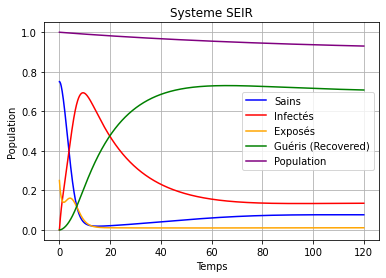

In [8]:
plt.plot(temps,S, 'blue', label = 'Sains')
plt.plot(temps,I, 'red', label = 'Infectés')
plt.plot(temps,E, 'orange', label = 'Exposés')
plt.plot(temps,R, 'green', label = 'Guéris (Recovered)')
plt.plot(temps, S+E+I+R, 'purple', label = 'Population')
plt.grid()
plt.title("Systeme SEIR")

plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()

plt.show()

In [9]:
M1 = matrice_jacobienne(y0, beta, alpha, gamma, nu, mu)
linalg.eig(M1)
#2 valeurs propres negatives + une valeur = 0 + une valeur reelle positive

(array([-0.01, -0.76,  0.05,  0.  ]),
 array([[1.        , 0.        , 0.99234531, 0.99632271],
        [0.        , 1.        , 0.07350706, 0.01310951],
        [0.        , 0.        , 0.09923453, 0.01660538],
        [0.        , 0.        , 0.        , 0.08302689]]))

In [10]:
#Exemple 2
nu = 0.009
mu = 0.015
alpha = 0.2
beta = 0.4
gamma = 0.4

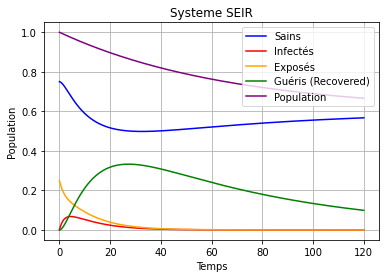

In [11]:
Sol = scipy.integrate.odeint(SEIR,y0,temps,args=(beta, alpha, gamma, nu, mu))
S, E, I, R = Sol.T

plt.plot(temps,S, 'blue', label = 'Sains')
plt.plot(temps,I, 'red', label = 'Infectés')
plt.plot(temps,E, 'orange', label = 'Exposés')
plt.plot(temps,R, 'green', label = 'Guéris (Recovered)')
plt.plot(temps, S+E+I+R, 'purple', label = 'Population')
plt.grid()
plt.title("Systeme SEIR")

plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()

plt.show()

In [12]:
M2 = matrice_jacobienne(y0, beta, alpha, gamma, nu, mu)
linalg.eig(M2)
#2 valeurs propres negatives + une valeur = 0 + une valeur reelle positive

(array([-0.015, -0.215,  0.4  ,  0.   ]),
 array([[1.        , 0.        , 0.54481864, 0.59920589],
        [0.        , 1.        , 0.36764185, 0.04180506],
        [0.        , 0.        , 0.75366579, 0.02996029],
        [0.        , 0.        , 0.        , 0.79894119]]))